<a href="https://colab.research.google.com/github/KunalDM1999/Task-4-Classification-with-Logistic-Regression./blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **imporeting all importent importents , data loding and  Data Preprocessing**

In [21]:
# Core libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)


In [15]:
data = pd.read_csv('/content/data.csv')
print(data.describe())
print(data.info())
data.head()

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**distribution plot**

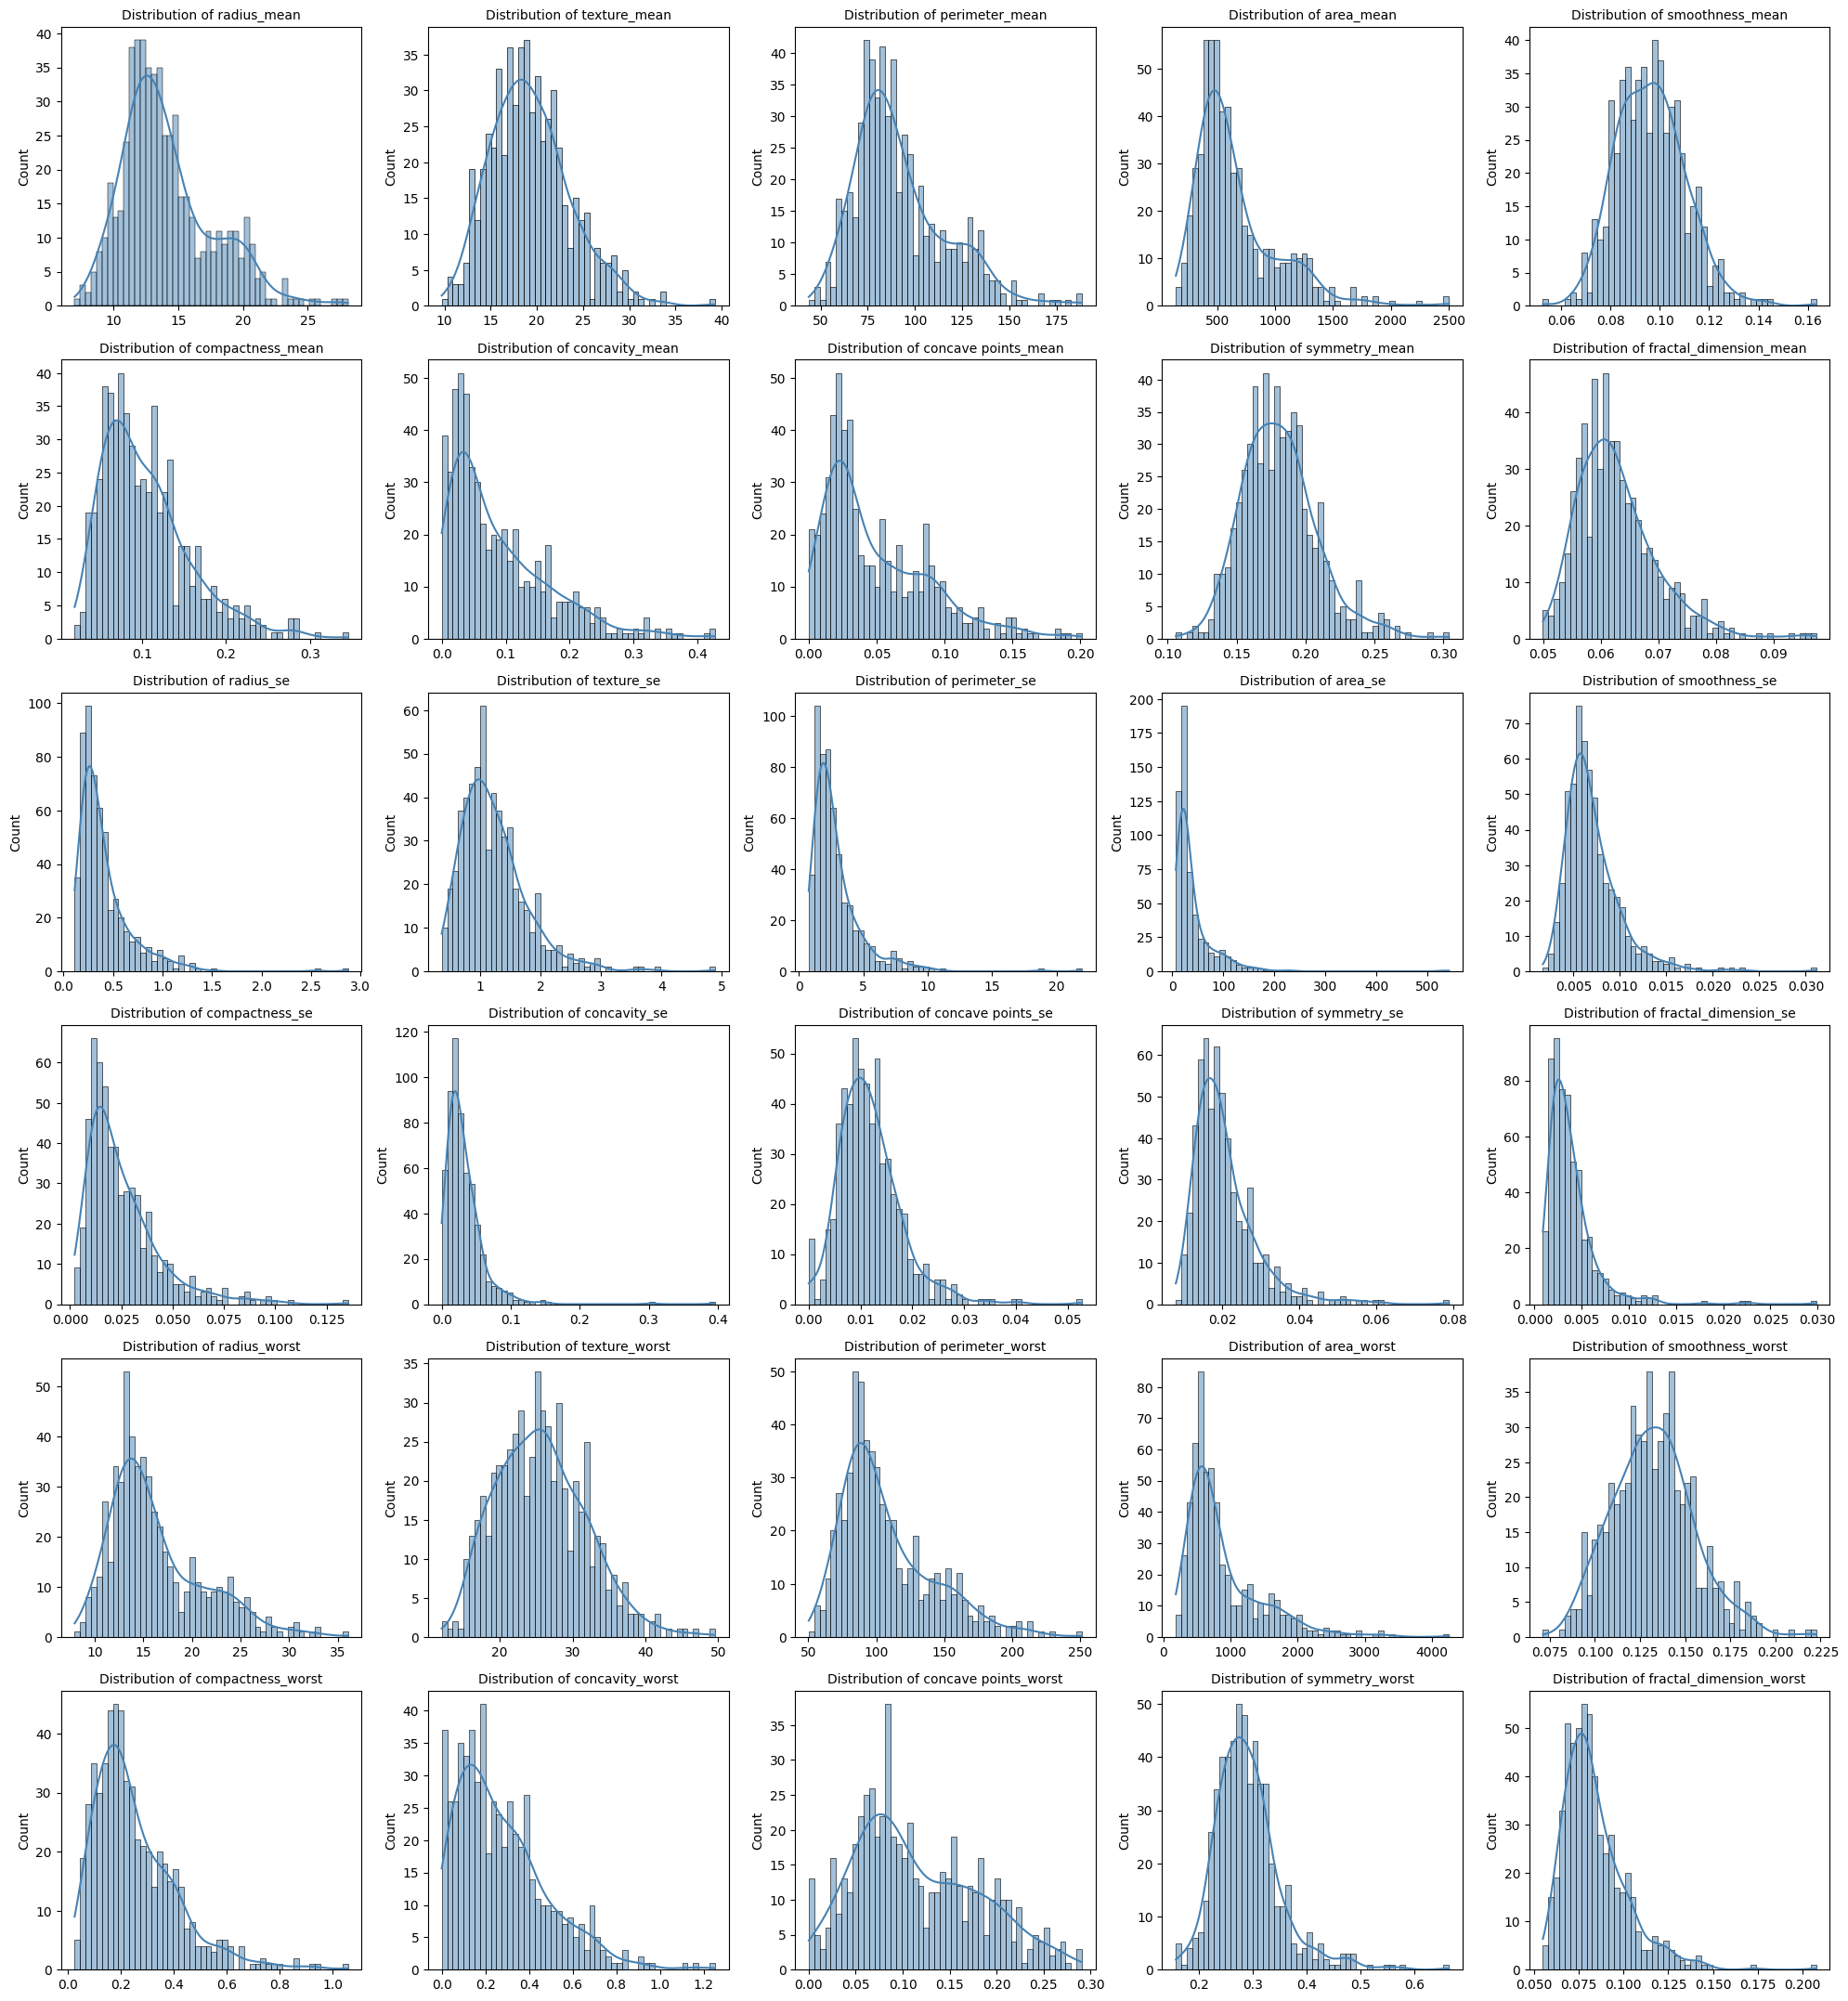

In [16]:
# Drop the unnecessary column
data.drop(columns=["Unnamed: 32","id"], inplace=True)

# Plot distribution of all numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(7, 5, i)
    sns.histplot(data[col], kde=True, bins=50, color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

**Encoding  and  Standardization**

In [17]:
# Encode 'diagnosis': M = 1 (Malignant), B = 0 (Benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data.iloc[:, 1:] = scaler.fit_transform(data.iloc[:, 1:])
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


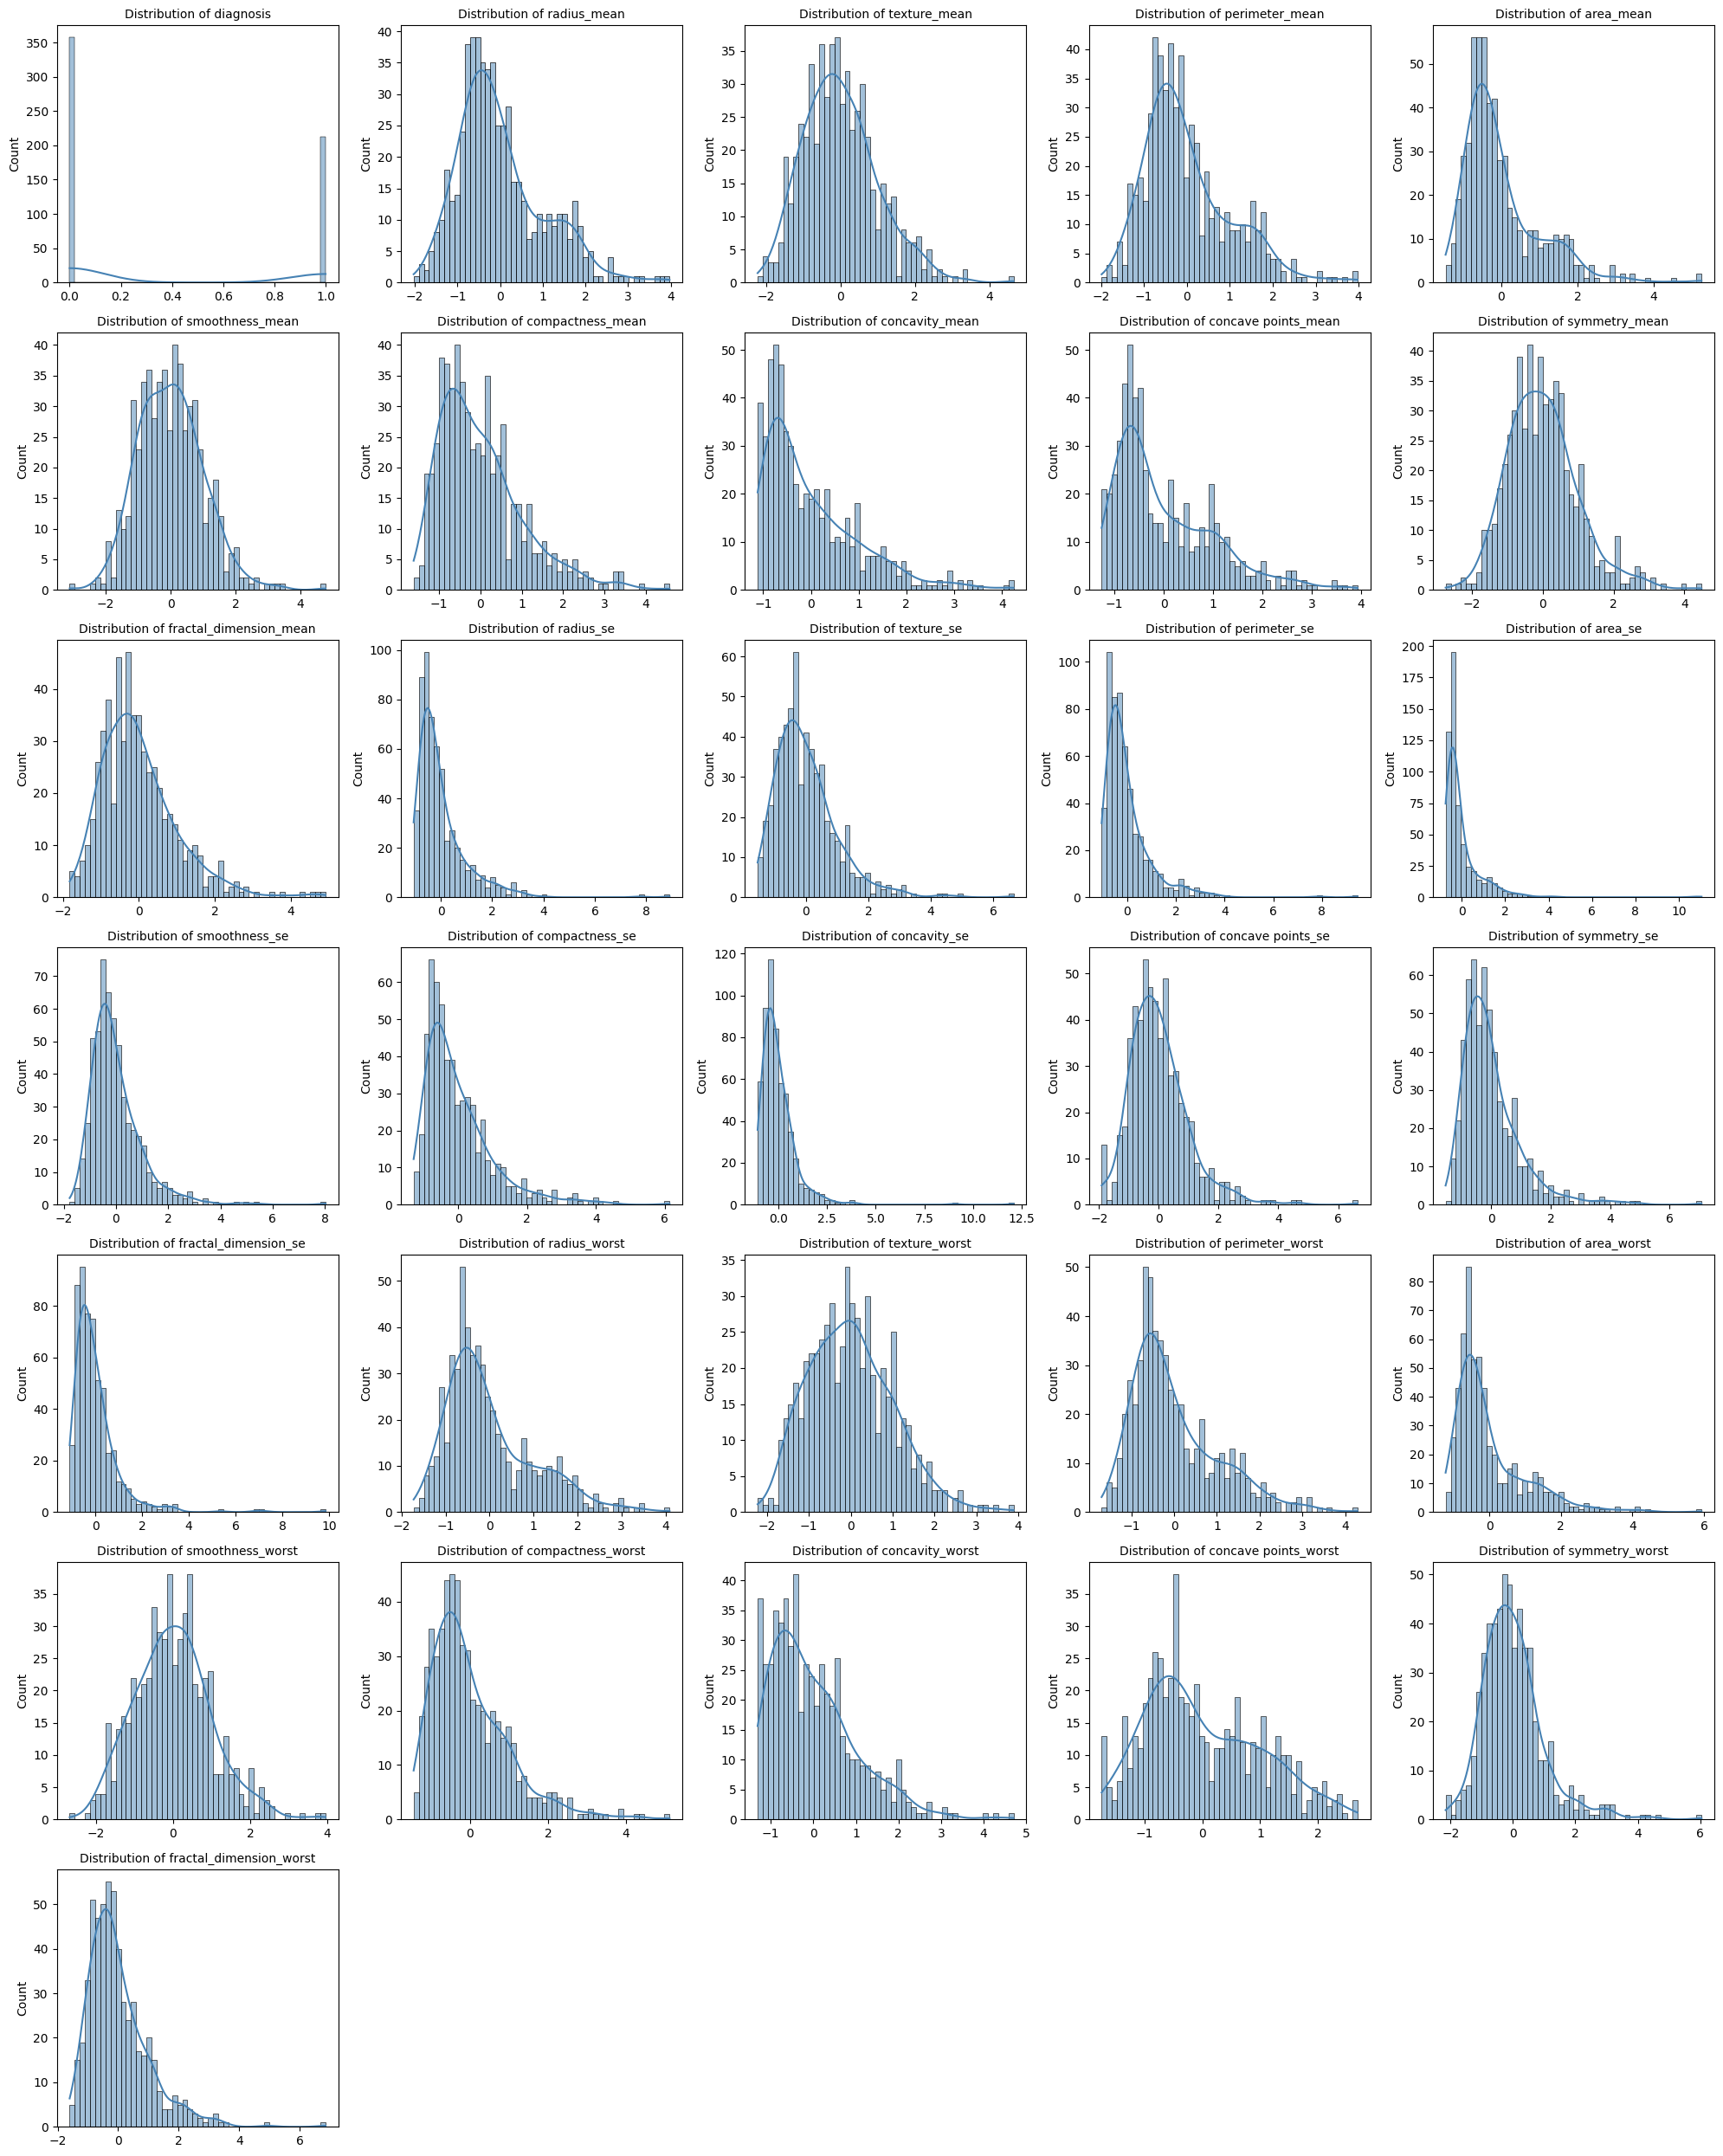

In [19]:

# Plot distribution of all numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(7, 5, i)
    sns.histplot(data[col], kde=True, bins=50, color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

# **Train-Test Split**

In [20]:
# Separate features and target
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Logistic Regression model
model = LogisticRegression(max_iter=1000)  # max_iter increased for better convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **Model Training**
**Evaluated model on both train and test sets using:**

1. Confusion Matrix

2. Precision, Recall, F1 Score

3. ROC-AUC Score

In [22]:
# Predictions for train and test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Probabilities for ROC-AUC
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# --- Train Metrics ---
print("🔹 Train Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_prob))

# --- Test Metrics ---
print("\n🔹 Test Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))

🔹 Train Set Evaluation
Confusion Matrix:
 [[248   1]
 [  4 145]]
Precision: 0.9931506849315068
Recall: 0.9731543624161074
F1 Score: 0.9830508474576272
ROC-AUC: 0.9971159807013288

🔹 Test Set Evaluation
Confusion Matrix:
 [[106   2]
 [  1  62]]
Precision: 0.96875
Recall: 0.9841269841269841
F1 Score: 0.9763779527559056
ROC-AUC: 0.9980893592004703


# **Model Evaluation**
**Confusion Matrix Visualization**

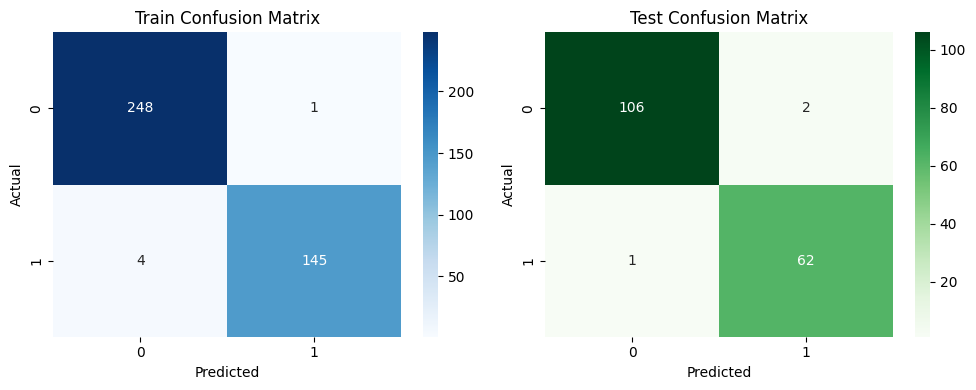

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


**Precision-Recall Curve :**  to check performance with respect to imbalanced classes


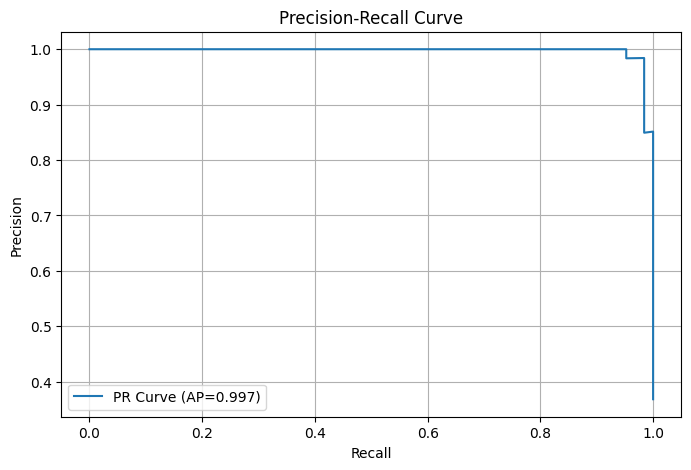

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Average precision score summary (area under PR curve)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'PR Curve (AP={avg_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# **ROC Curve:**
**to visualize performance across all classification thresholds**

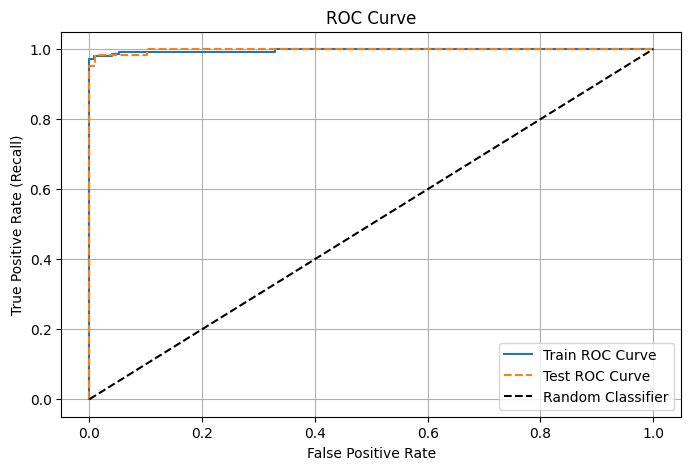

In [36]:
from sklearn.metrics import roc_curve, auc

# ROC values
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr_train, tpr_train, label='Train ROC Curve')
plt.plot(fpr_test, tpr_test, label='Test ROC Curve', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


**Found and applied optimal threshold from ROC curve using Youden’s J statistic.**

In [37]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for positive class (test set)
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate Youden's J statistic
J = tpr - fpr

# Find threshold that maximizes J
optimal_idx = J.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.3f}")

# Predict using this optimal threshold
y_pred_optimal = (y_scores >= optimal_threshold).astype(int)

# Evaluate metrics at optimal threshold
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimal))
print(f"Precision: {precision_score(y_test, y_pred_optimal):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_optimal):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_optimal):.3f}")


Optimal Threshold: 0.532
Confusion Matrix:
 [[107   1]
 [  1  62]]
Precision: 0.984
Recall: 0.984
F1 Score: 0.984
